### 3.7 Comparando as performances

Objetivo: Compare o tempo de execução de três algoritmos diferentes de otimização
(busca aleatória, busca em grade e algoritmos genéticos) para resolver o problema das
caixas binárias. Para este exercício, considere como critério de parada para o algoritmo
genético e para a busca aleatória o ato de encontrar a resposta do problema. Mantenha
o algoritmo de busca em grade com o critério de parada visto na disciplina (isto é, testar
todas as possibilidades)

Resolução:

Para atacar esse monstrinho, irei implementar três algoritmos em blocos separados:

- Busca Aleatória

- Busca em Grade

- Algoritmos Genéticos

Para cada algoritmo, realizarei 50 execuções variando o número de caixas de n = 6 até n = 10. Em seguida, será calculada a média do tempo de busca para cada valor de n. Esses resultados médios serão utilizados para comparar o desempenho dos três algoritmos em diferentes cenários, com base na quantidade de caixas.


Para medir o tempo de cada busca, será utilizado o módulo `time`, os tempos de execução para um mesmo n será armazenado numa lista, a cada iteração. 

Como todos os algoritmos irão resolver o mesmo problema, das caixas binárias, a função objetivo será a mesma. Ela irá retornar a soma dos valores do candidato.

Os parâmetros também serão fixos para cada algoritmo, e teremos uma lista para armazenar a a média de tempos para cada tipo.



In [45]:
def funcao_objetivo_cb(candidato):
    return sum(candidato)

# Parâmetros
n_min, n_max = 6, 16
numero_buscas = 50


lista_medias_tempo_busca_aleatoria = []
lista_medias_tempo_busca_em_grade = []
lista_medias_tempo_algoritmos_geneticos = []

### Algoritmo Busca Aleatória


Para esse algoritmo, serão gerados genes com o módulo `random`, o número de genes será passado como parâmetro da função `cria_candidato_cb`.

In [46]:
import random 

def gene_cb():
    valores_possiveis = [0, 1]
    gene = random.choice(valores_possiveis)
    return gene

def cria_candidato_cb(n):
    candidato = []
    for _ in range(n):
        gene = gene_cb()
        candidato.append(gene)
    return candidato

Agora que podemos criar candidatos, podemos gerar candidatos até que o melhor candidato seja encontrado para diferentes `n`. Usaremos o `while` para definir o critério de parada.

In [47]:
import time
import numpy as np

def busca_aleatoria(n, num_buscas=10):
    """Executa a busca aleatória para um valor de n e retorna o tempo médio."""
    tempos = []

    for busca in range(1, num_buscas + 1):
        inicio = time.time()

        melhor_resultado = [1] * n  # vetor alvo (ideal)
        melhor_candidato = cria_candidato_cb(n)

        tentativa = 0
       

        while sum(melhor_candidato) < sum(melhor_resultado):
            candidato = cria_candidato_cb(n)
            fobj = funcao_objetivo_cb(candidato)

            if sum(candidato) > sum(melhor_candidato):
                melhor_candidato = candidato

            tentativa += 1

        fim = time.time()
        tempo = fim - inicio
        tempos.append(tempo)

        print(f"n = {n}, busca {busca}, resolvido na tentativa {tentativa}, tempo: {tempo:.4f}s")

    return np.mean(tempos)

# Loop principal
for n in range(n_min, n_max + 1):
    media_tempo = busca_aleatoria(n, numero_buscas)
    lista_medias_tempo_busca_aleatoria.append(media_tempo)



n = 6, busca 1, resolvido na tentativa 177, tempo: 0.0000s
n = 6, busca 2, resolvido na tentativa 66, tempo: 0.0000s
n = 6, busca 3, resolvido na tentativa 7, tempo: 0.0000s
n = 6, busca 4, resolvido na tentativa 57, tempo: 0.0000s
n = 6, busca 5, resolvido na tentativa 4, tempo: 0.0000s
n = 6, busca 6, resolvido na tentativa 16, tempo: 0.0000s
n = 6, busca 7, resolvido na tentativa 22, tempo: 0.0000s
n = 6, busca 8, resolvido na tentativa 17, tempo: 0.0000s
n = 6, busca 9, resolvido na tentativa 24, tempo: 0.0000s
n = 6, busca 10, resolvido na tentativa 51, tempo: 0.0000s
n = 6, busca 11, resolvido na tentativa 21, tempo: 0.0000s
n = 6, busca 12, resolvido na tentativa 15, tempo: 0.0000s
n = 6, busca 13, resolvido na tentativa 19, tempo: 0.0000s
n = 6, busca 14, resolvido na tentativa 110, tempo: 0.0000s
n = 6, busca 15, resolvido na tentativa 61, tempo: 0.0000s
n = 6, busca 16, resolvido na tentativa 118, tempo: 0.0000s
n = 6, busca 17, resolvido na tentativa 54, tempo: 0.0000s
n = 6

In [48]:
# Exibir resultados finais
print("\nMédias dos tempos por valor de n:")
for n, media in zip(range(n_min, n_max + 1), lista_medias_tempo_busca_aleatoria):
    print(f"n = {n}: média de tempo = {media:.10f} segundos")


Médias dos tempos por valor de n:
n = 6: média de tempo = 0.0001626730 segundos
n = 7: média de tempo = 0.0007332087 segundos
n = 8: média de tempo = 0.0012991953 segundos
n = 9: média de tempo = 0.0036190891 segundos
n = 10: média de tempo = 0.0083002806 segundos
n = 11: média de tempo = 0.0125792408 segundos
n = 12: média de tempo = 0.0379140711 segundos
n = 13: média de tempo = 0.0698617220 segundos
n = 14: média de tempo = 0.1403465176 segundos
n = 15: média de tempo = 0.3382645178 segundos
n = 16: média de tempo = 0.7121740627 segundos


### Busca em Grade

In [49]:
from itertools import product

def busca_em_grade(n):
    """Executa a busca em grade para n caixas e retorna o tempo total de execução."""
    melhor_resultado = [1] * n
    melhor_candidato = None
    melhor_fobj = float('-inf')

    inicio = time.time()

    for candidato in product([0, 1], repeat=n):
        fobj = funcao_objetivo_cb(candidato)
        if fobj > melhor_fobj:
            melhor_fobj = fobj
            melhor_candidato = candidato
         
        if list(candidato) == melhor_resultado:
            break

    fim = time.time()
    tempo_total = fim - inicio

    return tempo_total


for n in range(n_min, n_max + 1):
    tempos_n = []
    for _ in range(numero_buscas):  
        tempo_execucao = busca_em_grade(n)
        tempos_n.append(tempo_execucao)
        print(f"n = {n}, tempo = {tempo_execucao:.8f}s")
    
    media_tempo = np.mean(tempos_n)
    lista_medias_tempo_busca_em_grade.append(media_tempo)


n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n = 6, tempo = 0.00000000s
n

In [50]:

# Resultados
print("\nTempos médios da Busca em Grade:")
for n, media in zip(range(n_min, n_max + 1), lista_medias_tempo_busca_em_grade):
    print(f"n = {n}: média de tempo = {media:.8f} segundos")



Tempos médios da Busca em Grade:
n = 6: média de tempo = 0.00000000 segundos
n = 7: média de tempo = 0.00015229 segundos
n = 8: média de tempo = 0.00016253 segundos
n = 9: média de tempo = 0.00031960 segundos
n = 10: média de tempo = 0.00048285 segundos
n = 11: média de tempo = 0.00104678 segundos
n = 12: média de tempo = 0.00190074 segundos
n = 13: média de tempo = 0.00395382 segundos
n = 14: média de tempo = 0.00814928 segundos
n = 15: média de tempo = 0.01732739 segundos
n = 16: média de tempo = 0.03443452 segundos


### Algoritmos Genéticos


Para esse tipo de algoritimo, precisisarei definir a função que cria uma população. A função de seleção, função de cruzamento, função objetivo e função de mutação, bem como definir as constantes. As funções serão importadas do arquivo `scrypt_3_7.py`

In [51]:
from scrypt_3_7 import funcao_objetivo_pop_cb as funcao_objetivo
from scrypt_3_7 import populacao_cb as cria_populacao
from scrypt_3_7 import selecao_roleta_max as funcao_selecao
from scrypt_3_7 import cruzamento_ponto_simples as funcao_cruzamento
from scrypt_3_7 import mutacao_simples_cb as funcao_mutacao

In [52]:
def busca_algoritmos_geneticos(TAMANHO_POPULACAO, n, CHANCE_DE_CRUZAMENTO, CHANCE_DE_MUTACAO, num_buscas):
    """Executa a busca por algoiritmos genéticos para n caixas e retorna o tempo total de execução."""

    lista_tempo = []
    for busca in range(1, num_buscas + 1):
        melhor_resultado_fit = n
        melhor_candidato_fit = 0

        inicio = time.time()
        # Seleção
        populacao = cria_populacao(TAMANHO_POPULACAO, n)
        fitness = funcao_objetivo(populacao)        
        selecionados = funcao_selecao(populacao, fitness)

        
        while melhor_candidato_fit < melhor_resultado_fit:
            
            # Cruzamento
            proxima_geracao = []
            for pai, mae in zip(selecionados[::2], selecionados[1::2]):
                individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
                proxima_geracao.append(individuo1)
                proxima_geracao.append(individuo2)
            
            # Mutação
            funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
            
            fitness = funcao_objetivo(proxima_geracao)
                
            maior_fitness = max(fitness)  

            melhor_candidato_fit = maior_fitness

        fim = time.time()

        tempo_total = fim - inicio

        lista_tempo.append(tempo_total)

    return np.mean(lista_tempo)

In [53]:
for n in range(n_min, n_max + 1):
    media_tempo = busca_algoritmos_geneticos(100, n, 0.5, 0.1, numero_buscas)
    lista_medias_tempo_algoritmos_geneticos.append(media_tempo)

print("\nTempos médios da Busca em Algoritmos Genéticos:")
for n, media in zip(range(n_min, n_max + 1), lista_medias_tempo_algoritmos_geneticos):
    print(f"n = {n}: média de tempo = {media:.8f} segundos")


Tempos médios da Busca em Algoritmos Genéticos:
n = 6: média de tempo = 0.00062927 segundos
n = 7: média de tempo = 0.00081793 segundos
n = 8: média de tempo = 0.00105307 segundos
n = 9: média de tempo = 0.00200465 segundos
n = 10: média de tempo = 0.00268754 segundos
n = 11: média de tempo = 0.00844699 segundos
n = 12: média de tempo = 0.01753092 segundos
n = 13: média de tempo = 0.02945849 segundos
n = 14: média de tempo = 0.06710977 segundos
n = 15: média de tempo = 0.14142640 segundos
n = 16: média de tempo = 0.27900982 segundos


Agora tendo cálculado a média de 50 amostras de tempo de N = 6 até N = 16, vamos analisar num gráfico a performace de cada algoritmo.

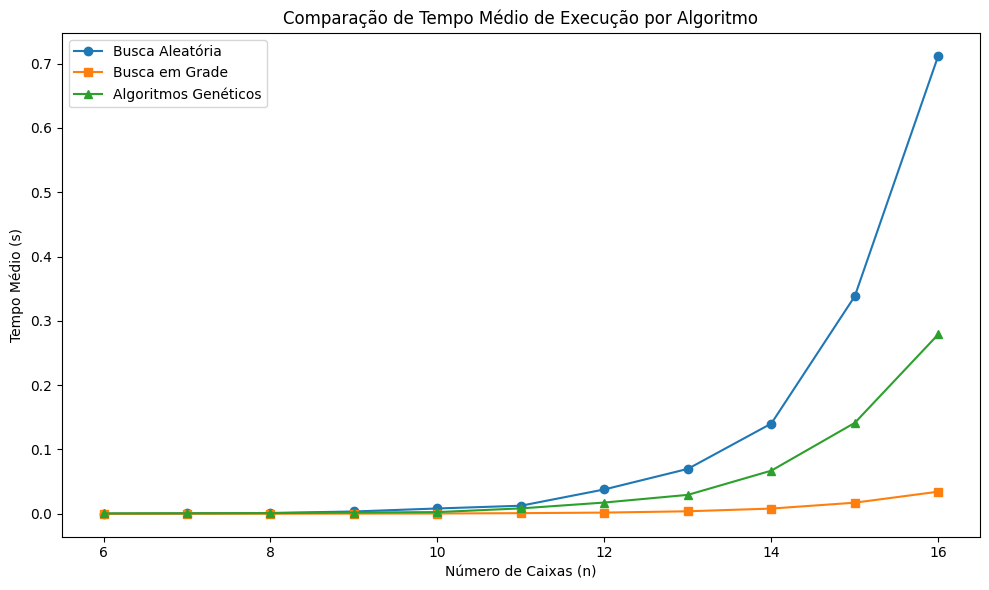

In [55]:
import matplotlib.pyplot as plt

# Suponha que você tenha os limites de n
n_values = list(range(n_min, n_max + 1))

plt.figure(figsize=(10, 6))
plt.plot(n_values, lista_medias_tempo_busca_aleatoria, label="Busca Aleatória", marker='o')
plt.plot(n_values, lista_medias_tempo_busca_em_grade, label="Busca em Grade", marker='s')
plt.plot(n_values, lista_medias_tempo_algoritmos_geneticos, label="Algoritmos Genéticos", marker='^')

plt.title("Comparação de Tempo Médio de Execução por Algoritmo")
plt.xlabel("Número de Caixas (n)")
plt.ylabel("Tempo Médio (s)")
plt.legend()
plt.tight_layout()
plt.show()


### Conclusões

Percebe-se que, para valores de 
𝑛 menores que 8, os tempos de execução entre os algoritmos permanecem na mesma ordem de grandeza, com uma diferença inferior a 0,01 segundos. No entanto, à medida que o número de caixas aumenta, a diferença nos tempos de execução torna-se mais pronunciada. Isso indica que a aleatoriedade no processo de busca da Busca Aleatória torna este algoritmo ineficiente, especialmente em problemas de maior escala. Por outro lado, o modelo de Busca em Grade, embora mais custoso em termos de tentativas — pois explora todas as possíveis combinações dos valores 0 e 1 para as caixas binárias —, se mostra mais eficiente em termos de tempo de execução conforme 
𝑛 aumenta, dado que o número de possibilidades é limitado.